# 住宅情報の分析

## 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_path = 'train.csv'
df = pd.read_csv(csv_path, index_col=0)

In [2]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

アイオワ州エイムズの住宅の価格を79の説明変数を使用して価格を予測するコンペティションである　　
目的変数 : SalePrice　　説明変数 : 建物クラス、ガレージの場所、プールの品質等　　

## 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。


- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [3]:
y = df.iloc[:, -1]
y.head() # 目的変数の作成

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

In [4]:
x = df.iloc[:, :79]
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
x.describe(include=[int, float]).shape # 数値型の数

(8, 36)

In [6]:
x.describe(include=object).shape # 数値型以外の数

(4, 43)

In [7]:
x.describe(include=[int, float]) # 特徴量の平均値と標準偏差、四分位数

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


## 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。


各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。


ResidentMario/missingno: Missing data visualization module for Python.


欠損値が何パーセント含まれるかを確認する。
- 5つ以上欠損値がある特徴量（列）は削除する。
- 5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。

In [8]:
x.isnull().sum(axis=0)

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

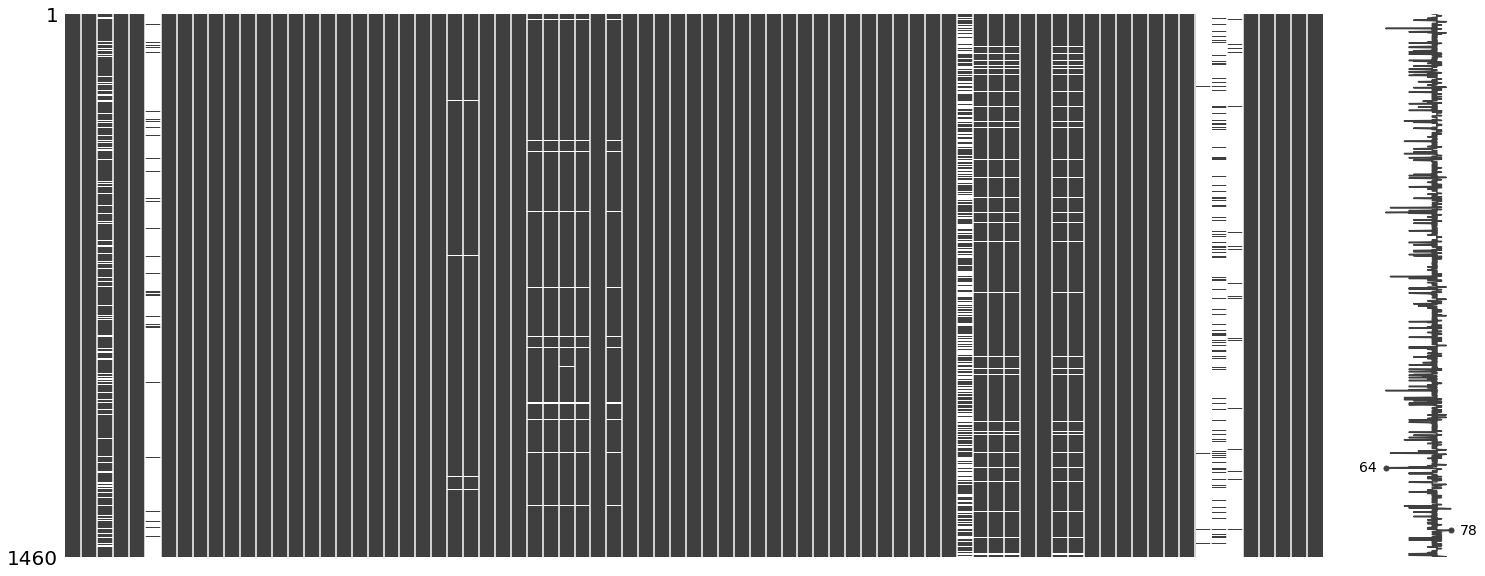

In [9]:
import missingno as msno
msno.matrix(x);

<AxesSubplot:>

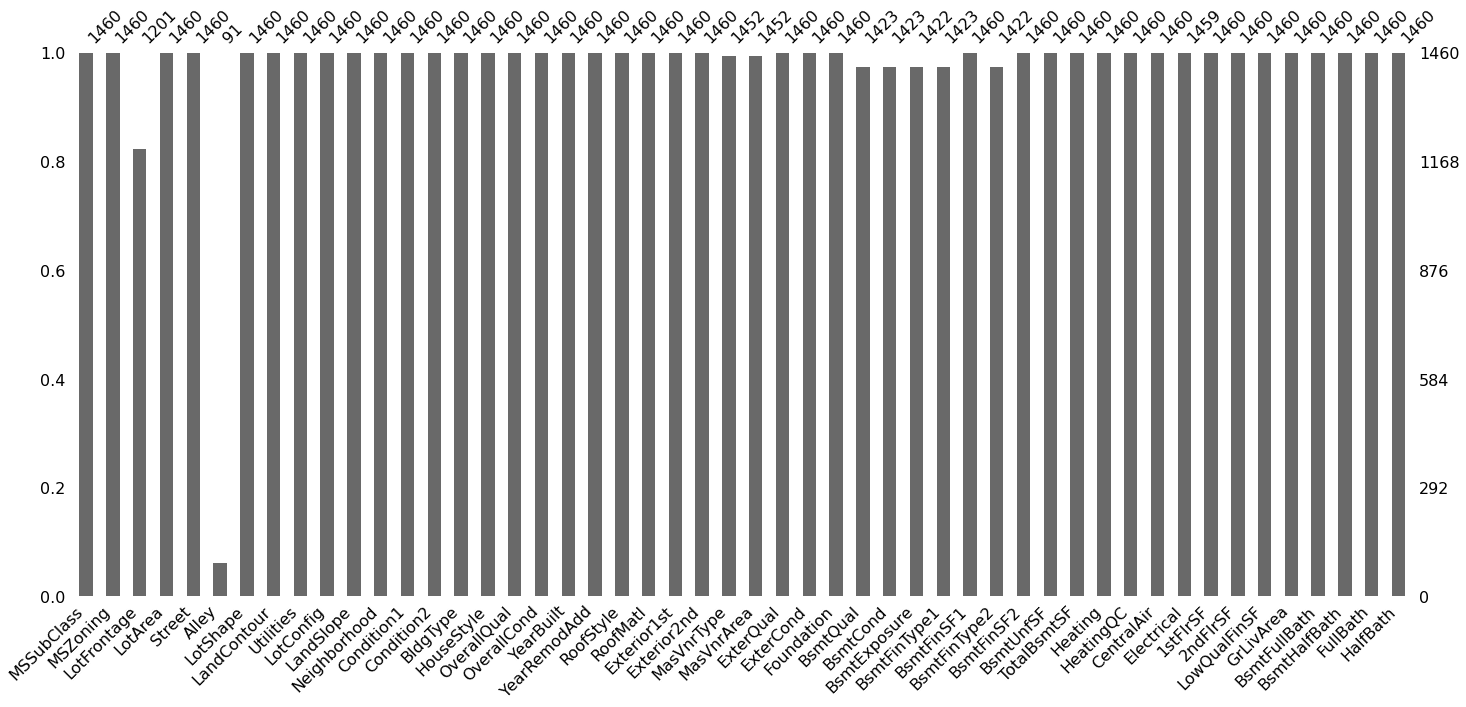

In [10]:
msno.bar(df.iloc[:, :50]); # 50が最大値っぽい

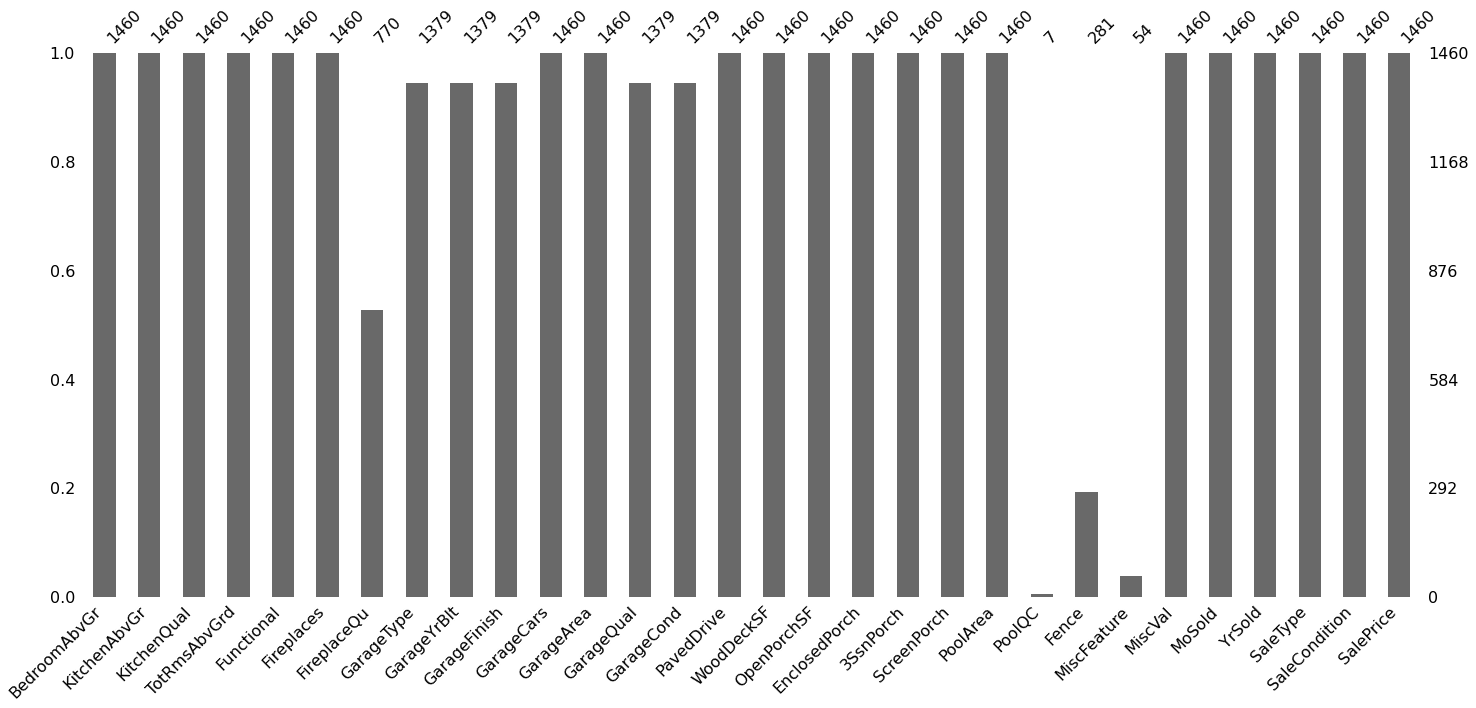

In [23]:
msno.bar(df.iloc[:, 50:]); # 50が最大値っぽい

In [11]:
# 欠損値の確認
null_count = x.isnull().sum(axis=0)
null_rate = x.isnull().sum(axis=0) / len(df)
null_table = pd.DataFrame({
    'null_count' : null_count,
    'null_rate' : null_rate
})
null_table

,null_count,null_rate
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,0.177397
LotArea,0,0.000000
Street,0,0.000000
...,...,...
MiscVal,0,0.000000
MoSold,0,0.000000
YrSold,0,0.000000
SaleType,0,0.000000


In [12]:
# null値が5個以上の列を削除
# 一個以上か全部かのoptionしかなかったため　forを使用している
count = 0
for i in x:
    if df[i].isnull().sum() >= 5:
        count += 1
        x.drop(i, axis=1, inplace=True) # 元データの変更
print(count, x.shape)

18 (1460, 61)


In [13]:
x.dropna(axis=0, inplace=True) # 行方向に削除
x.shape

(1459, 61)

## 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

- 尖度
- 歪度

### 歪度
分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標  
- 「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値　  
- 「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値　  
左右対称の分布（例えば正規分布）の場合には0  
![](https://bellcurve.jp/statistics/wp-body/wp-content/uploads/2018/01/795316b92fc766b0181f6fef074f03fa.png)

### 尖度
分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す。  
- 正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値  
- 正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値  
- 正規分布の場合には0
![](https://bellcurve.jp/statistics/wp-body/wp-content/uploads/2018/01/2b530e80c7d0de90885e285c5d798063.png)

## 【問題6】分布の確認
seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
目的変数に対して対数変換を行う。
対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

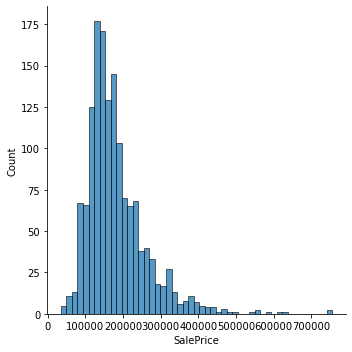

In [14]:
import seaborn as sea
sea.displot(y); # ヒストグラム

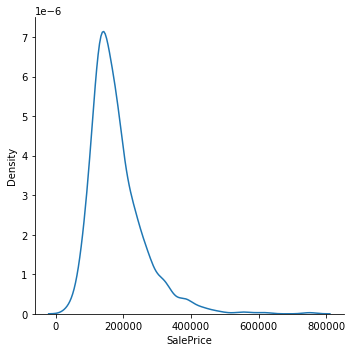

In [15]:
sea.displot(y ,kind='kde'); # カーネル密度

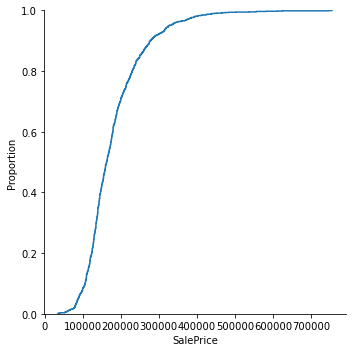

In [16]:
sea.displot(y ,kind='ecdf'); # 累計密度

In [17]:
print('目的変数の尖度 : {}'.format(y.skew()))
print('目的変数の歪度 : {}'.format(y.kurt()))

目的変数の尖度 : 1.8828757597682129
目的変数の歪度 : 6.536281860064529


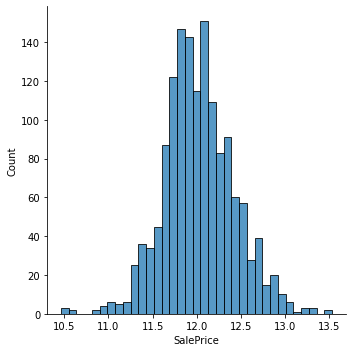

In [18]:
y_log = y.apply(np.log)
sea.displot(y_log);

In [19]:
print('目的変数の尖度 : {}'.format(y_log.skew()))
print('目的変数の歪度 : {}'.format(y_log.kurt()))

目的変数の尖度 : 0.12133506220520406
目的変数の歪度 : 0.8095319958036296


今回のデータは家の価格のため、中央値と平均値が大きく異なる分布となる。  
確率分布的には低い値の方が高いが、一部の高い値の影響をうけ平均値が大きくなってしまうことがある。  
その様な分布を対数正規関数と呼ぶ。(例　年収、貯蓄等)  
その名の通り正規分布の対数をとった様な分布なので、対数を取ることによって正規分布に近づけることができた。  

## 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。


- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

《補足》


重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

### 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける

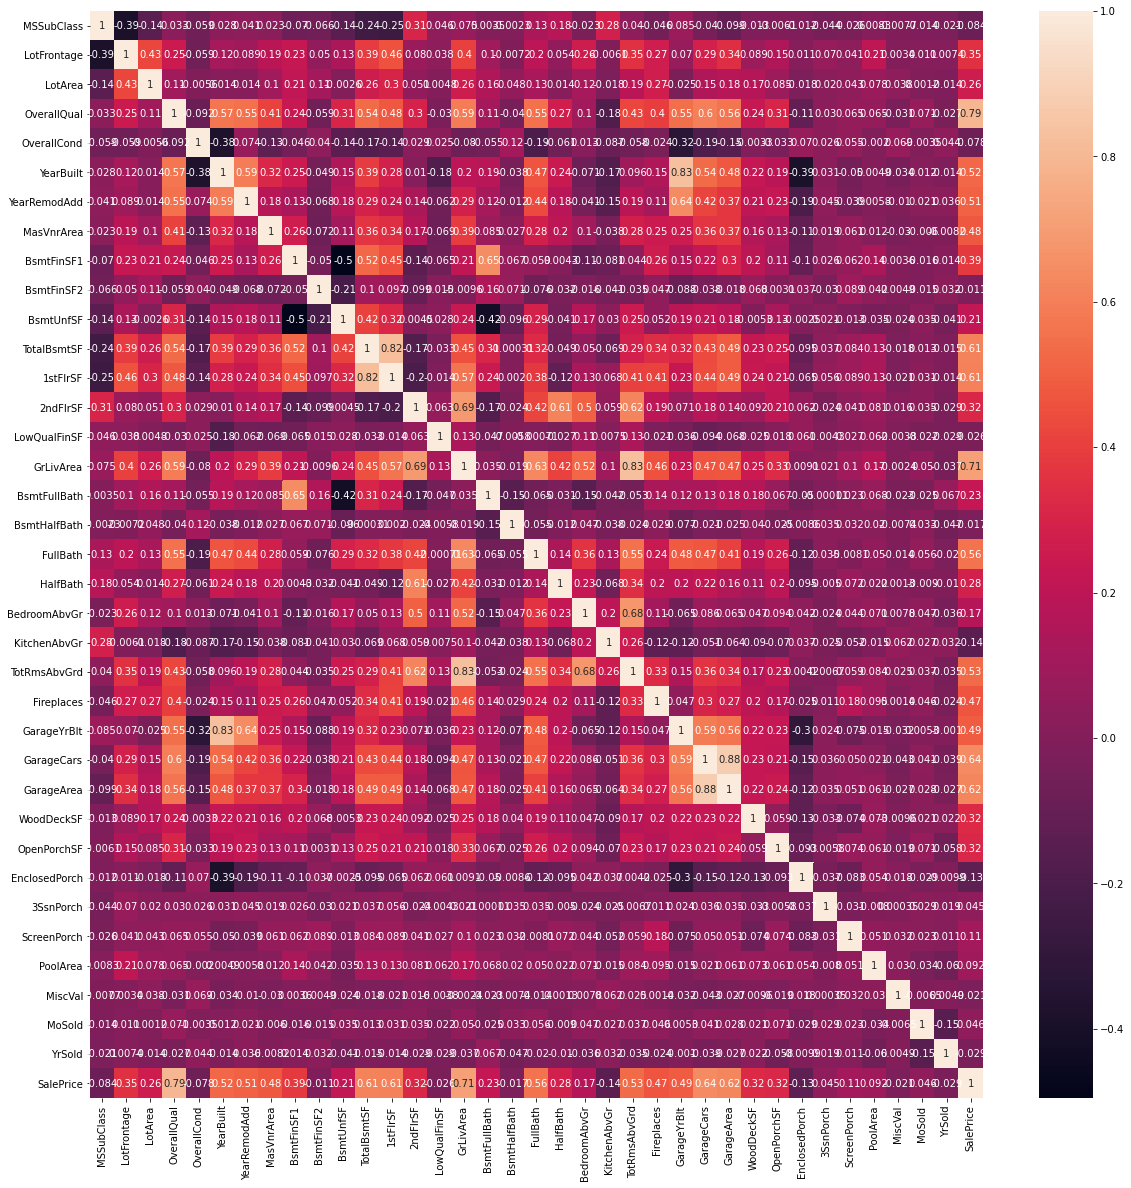

In [20]:
plt.figure(figsize=(20, 20))
sea.heatmap(df.corr(), annot=True);

相関係数のヒートマップより相関が0.8を超えているのは

- GarageArea-GarageCars : 0.88  
    車の大きさと車庫の大きさ
- GrLivArea-TotRmsAbvGrd: : 0.83  
    リビングルームのグレードと全ての部屋のグレード
- GarageYrBltとYearBuilt : 0.83  
    車庫の建てられた年数と家が建てられた年数


### 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [21]:
corr = df.corr()
corr.iloc[-1].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

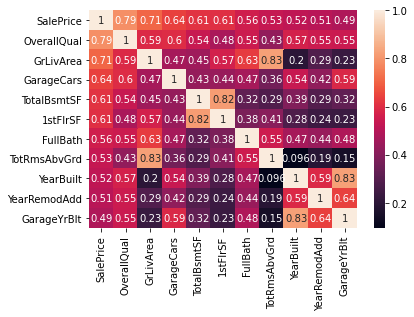

In [22]:
df_hcorr = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']]
sea.heatmap(df_hcorr.corr(), annot=True);

### 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる

- OverallQual : 0.79  
    1<x<10で表される家の全体的な材料
- GrLivArea : 0.71  
    リビングルームのグレード
- GarageCars : 0.64  
    車が何台入る大きさの車庫か
- TotalBsmtSF : 0.61  
    地下室の大きさ
- 1stFlrSF : 0.61  
    一階の大きさ
- FullBath : 0.56  
    お風呂の数
- TotRmsAbvGrd : 0.53  
    お風呂を除く部屋の数
- YearBuilt : 0.52  
    家が何年に建てられたか  
- YearRemodAdd : 0.51  
    リフォームを行った年数(最新)
- GarageYrBlt : 0.49  
    車庫を建てた年数

### 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

- GrLivArea-TotRmsAbvGrd : 0.83
- 1stFlrSF-TotalBsmtSF : 0.82
- YearBuilt-GarageYrBlt : 0.83